In [50]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Lectura de los datos
df=pd.read_csv("data.txt")

# Reemplazar las variables categoricas por variables dummies
df = pd.get_dummies(df, columns=['team'], dtype = int)
df = pd.get_dummies(df, columns=['quarter'], dtype = int)
df = pd.get_dummies(df, columns=['day'], dtype = int)

# Corregir los errores dentro de los datos
df['department'] = df['department'].replace('finishing ', 'finishing')


df.head()

,date,department,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1/1/2015,sweing,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1/1/2015,finishing,0.75,3.94,NaN,960,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1/1/2015,sweing,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1/1/2015,sweing,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1/1/2015,sweing,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
# Creacion del dataframe sin la informacion asociada a la variable finishing
df_sinFinishing = df.drop(df[df['department'] == 'finishing'].index)

# Verificacion de que el departamento finishing se haya borrado del df
valores_unicos = df_sinFinishing['department'].unique()
print(valores_unicos)


['sweing']


In [52]:
df_sinFinishing.shape

(691, 35)

# Modelo de Regresion Sin Departamento 'Finishing'

In [53]:
# Variables pertenecientes al modelo completo declarando como base al equipo 11, quarter 5, y el dia miercoles
features = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'team_1', 'team_2', 'team_3', 'team_4', 'team_5',
       'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday'
]

X = df_sinFinishing [features]
Y = df_sinFinishing['actual_productivity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

X_train = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_train).fit()

print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.803
Model:                             OLS   Adj. R-squared:                  0.792
Method:                  Least Squares   F-statistic:                     68.80
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):          2.22e-152
Time:                         18:23:45   Log-Likelihood:                 645.47
No. Observations:                  518   AIC:                            -1231.
Df Residuals:                      488   BIC:                            -1103.
Df Model:                           29                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [54]:
# Variables significativas y no significativas dentro del modelo
summary_table = model.summary().tables[1]
p_values = [row[4] for row in summary_table.data[1:]]
variables = [row[0] for row in summary_table.data[1:]]

p_values = [float(pvalue.strip()) for pvalue in p_values]

for i in range(len(variables)):
    pvalue = (p_values[i])
    variable = variables[i]
    if pvalue < 0.1:
        texto = 'Significativo'
    else:
        texto = 'NO Significativo'
    print(variable + ': ' + texto)

const: Significativo
targeted_productivity: Significativo
smv: Significativo
wip: NO Significativo
over_time: Significativo
incentive: Significativo
idle_time: Significativo
idle_men: Significativo
no_of_style_change: NO Significativo
no_of_workers: Significativo
team_1: NO Significativo
team_2: NO Significativo
team_3: NO Significativo
team_4: NO Significativo
team_5: NO Significativo
team_6: NO Significativo
team_7: NO Significativo
team_8: NO Significativo
team_9: NO Significativo
team_10: NO Significativo
team_11: Significativo
quarter_Quarter1: NO Significativo
quarter_Quarter2: NO Significativo
quarter_Quarter3: NO Significativo
quarter_Quarter4: NO Significativo
day_Monday: NO Significativo
day_Saturday: NO Significativo
day_Sunday: NO Significativo
day_Thursday: NO Significativo
day_Tuesday: NO Significativo


Prueba y evaluacion del modelo

In [55]:
# Error cuadratico medio
Y_pred = model.predict(sm.add_constant(X_test))
mse_model = mean_squared_error(Y_test, Y_pred)

print("Error cuadrático medio del modelo:", mse_model)


Error cuadrático medio del modelo: 0.0041733683876170775


In [56]:
# Validacion cruzada
model_sklearn = LinearRegression()
scores = cross_val_score(model_sklearn, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores

print("MSE para cada fold:", mse_scores)
print("MSE promedio:", np.mean(mse_scores))
print("Desviación estándar del MSE:", np.std(mse_scores))


MSE para cada fold: [0.19759082 0.00938355 0.00354196 0.00400595 0.00510224]
MSE promedio: 0.04392490243226328
Desviación estándar del MSE: 0.07686068318568758


Entrenamiento modelo reducido

In [57]:
# Variables pertenecientes al modelo reducido
new_features = [
    "targeted_productivity", "smv",
    "over_time", "incentive", "idle_time",
    "idle_men", "no_of_workers", "team_11"
]


X_new = df_sinFinishing[new_features]
Y_new = df_sinFinishing['actual_productivity']

X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, random_state=1)

X_train_new = sm.add_constant(X_train_new)

model_new = sm.OLS(Y_train_new, X_train_new).fit()

Prueba y evaluacion del modelo reducido

In [58]:
#Error cuadratico medio
Y_pred_new = model_new.predict(sm.add_constant(X_test_new))
mse_model_new = mean_squared_error(Y_test_new, Y_pred_new)

print("Error cuadrático medio del modelo reducido:", mse_model_new)

Error cuadrático medio del modelo reducido: 0.004065568106135445


In [59]:
# Validacion cruzada
model_sklearn = LinearRegression()
scores = cross_val_score(model_sklearn, X_train_new, Y_train_new, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores

print("MSE para cada fold:", mse_scores)
print("MSE promedio:", np.mean(mse_scores))
print("Desviación estándar del MSE:", np.std(mse_scores))

MSE para cada fold: [0.07527195 0.00833326 0.00341386 0.00387849 0.00496164]
MSE promedio: 0.01917184064249733
Desviación estándar del MSE: 0.028102765665293


¿El modelo reducido es mejor que el modelo completo? ¿El quitar las variables no significativas mejora el modelo?

In [60]:
# prueba F-Parcial para modelos anidados, Ho: Es mejor el modelo reducido, H1:¬Ho
f_statistic, p_value, _ = model.compare_f_test(model_new)

print(f'Estadístico F parcial: {f_statistic}')
print(f'Valor p: {p_value}')


if p_value < 0.05:
    print('El modelo completo es estadisticamente mejor que el modelo reducido')
else:
    print('El modelo reducido es estadisticamente mejor que el modelo completo')

Estadístico F parcial: 0.9866697563183408
Valor p: 0.4783571351114033
El modelo reducido es estadisticamente mejor que el modelo completo


Deteccion Heteroscedasticidad

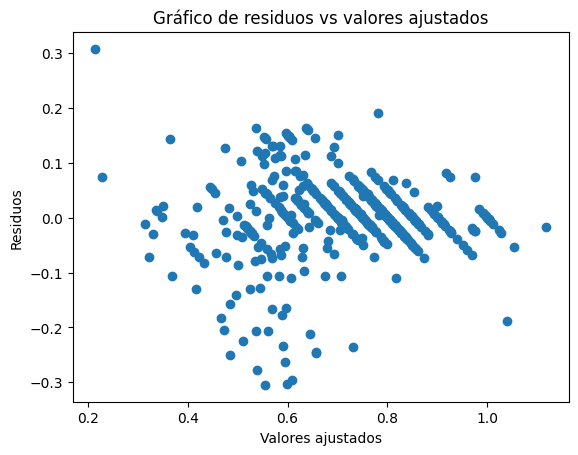

In [61]:
residuals = model.resid

# Graficar los residuos contra los valores ajustados
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs valores ajustados')
plt.show()